In [77]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from src.utils import get_wandb_summaries
from src.visualization.visualize import bars_with_labels_and_errors
import numpy as np

%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
runs = [
        "1szazbm1",
        "20gczthf",
        "3g83xe10",
        "301fj0y2",
        "289402rh",
        "2911eip8",
        "2czots5t",
        "23qp4fss",
        "2ix8tob4",
        "1e5ddrbv",
        "z0nbehr0",
        "2ncle1v9",
        "3ss14njj"
    ]
    
summaries = get_wandb_summaries(runs)

In [64]:
summaries_df = pd.DataFrame(summaries)
summaries_df["multitask"] = summaries_df["command"].str.contains("pretrained_predict_daily_features.ckpt")

is_multitask = summaries_df[summaries_df["multitask"]]
summaries_df.loc[summaries_df["multitask"],"model"] = is_multitask["model"] + " - Daily Features Multitask"

summaries_df["test/roc_ci"] = zip(summaries_df['test/roc_auc_ci_low'], summaries_df['test/roc_auc_ci_high'])

In [63]:
summaries_df.columns

Index(['_step', 'model', '_wandb', '_timestamp', 'test/pr_auc',
       'feature_importance', 'task', '_runtime', 'eval/roc_auc',
       'test/roc_auc', 'test/support', 'train/roc_auc', 'command', 'id',
       'train/pr_auc', 'eval/roc_table', 'train/roc_table',
       'train/best_pr_auc', 'lr-Adam', 'test/pr_table', 'test/best_roc_auc',
       'test/pr_auc_ci_high', 'trainer/global_step', 'eval/pr_table',
       'test/loss_epoch', 'test/best_pr_auc', 'test/roc_auc_ci_high', 'epoch',
       'test/loss_step', 'test/roc_table', 'eval/best_pr_auc',
       'eval/det_table', 'eval/loss_step', 'test/det_table', 'eval/loss_epoch',
       'eval/pr_auc_ci_high', 'train/pr_table', 'train/det_table',
       'eval/pr_auc_ci_low', 'train/best_roc_auc', 'eval/roc_auc_ci_high',
       'eval/pr_auc', 'eval/best_roc_auc', 'test/pr_auc_ci_low',
       'eval/roc_auc_ci_low', 'test/roc_auc_ci_low', 'train/loss',
       'multitask'],
      dtype='object')

In [81]:
manual_adjustments = {
    "3ss14njj":[("multitask",True),("task","PredictSurveyCol-symptom_severity__cough_q_3 > 0 | symptom_severity__cough_q_2 > 0"),
                ("model","CNNToTransformerEncoder - Daily Features Multitask")]
}

for run_id, changes in manual_adjustments.items():
    for k,v in changes:
        summaries_df.loc[summaries_df["id"] == run_id,k] = v

summaries_df["test/roc_auc_ci_minus"] = summaries_df["test/roc_auc"] - summaries_df["test/roc_auc_ci_low"]
summaries_df["test/roc_auc_ci_plus"] =  summaries_df["test/roc_auc_ci_high"] - summaries_df["test/roc_auc"]

/homes/gws/mikeam/miniconda3/envs/seattleflustudy/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


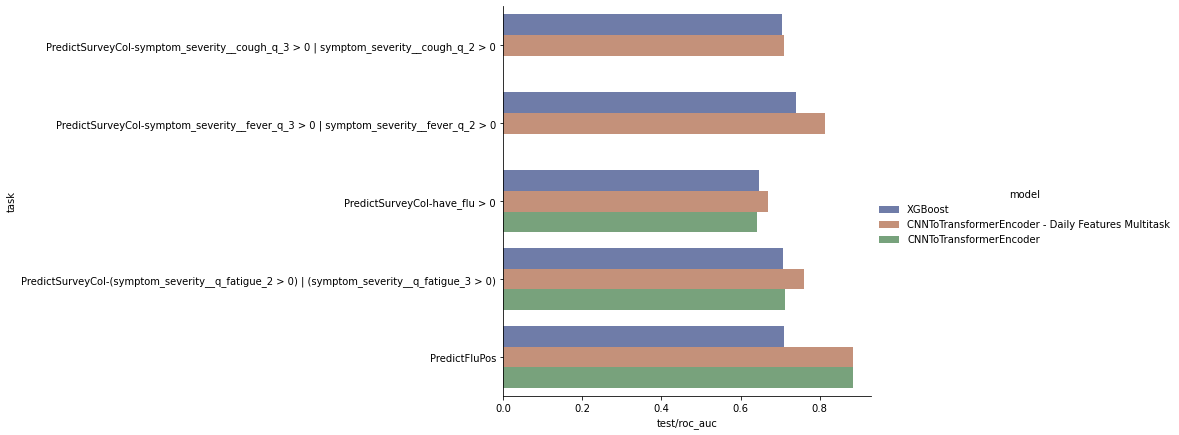

In [102]:
g = sns.catplot(
    data=summaries_df, kind="bar",
    y="task", x="test/roc_auc", hue="model",
    ci="test/roc_auc_ci_plus", palette="dark", alpha=.6, height=6
)

def add_error_bars(x,y,lower,upper,**kwargs):
    print(list(lower))
    print(x,y)
    plt.errorbar(x,y,[list(lower.fillna(0)),list(upper.fillna(0))])



# g.map(plt.errorbar, "test/roc_auc", "task", "test/roc_auc_ci_plus", marker="o")

/homes/gws/mikeam/miniconda3/envs/seattleflustudy/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


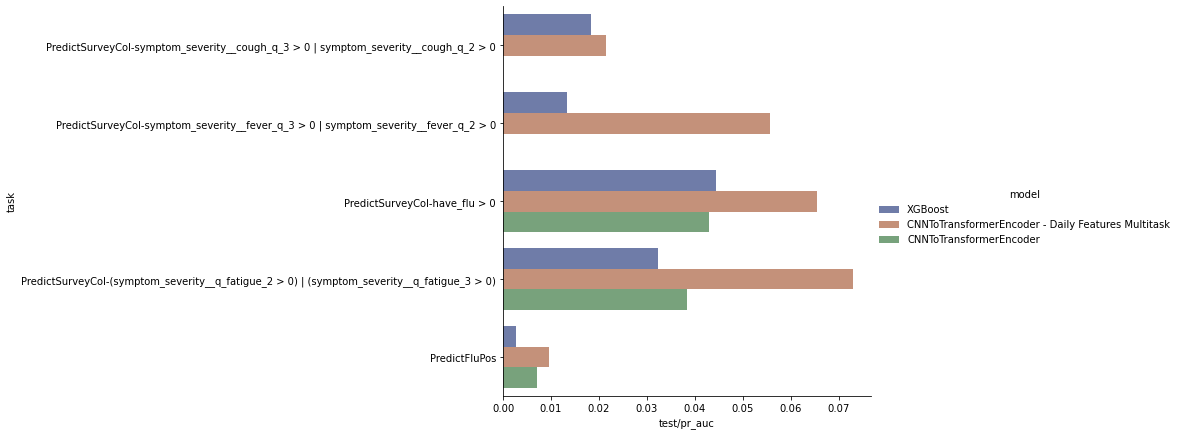

In [119]:
g = sns.catplot(
    data=summaries_df, kind="bar",
    y="task", x="test/pr_auc", hue="model",
    palette="dark", alpha=.6, height=6
)

In [129]:
summaries_df[["test/pr_auc_ci_low","test/pr_auc_ci_high","test/roc_auc_ci_low","test/roc_auc_ci_low","task","model"]]\
                    .groupby(["task","model"]).max() 

test/pr_auc_ci_low  ...  test/roc_auc_ci_low
task                                               model                                                                   ...                     
PredictFluPos                                      CNNToTransformerEncoder                                       0.003365  ...             0.835983
                                                   CNNToTransformerEncoder - Daily Features Multitask            0.001126  ...             0.840288
                                                   XGBoost                                                            NaN  ...                  NaN
PredictSurveyCol-(symptom_severity__q_fatigue_2... CNNToTransformerEncoder                                       0.030250  ...             0.694916
                                                   CNNToTransformerEncoder - Daily Features Multitask            0.056788  ...             0.743504
                                                   XGBoost                                                            NaN  ...                  NaN
PredictSurveyCol-have_flu > 0                      CNNToTransformerEncoder                                       0.037891  ...             0.629423
                                                   CNNToTransformerEncoder - Daily Features Multitask            0.057527  ...             0.658944
                                                   XGBoost                                                            NaN  ...                  NaN
PredictSurveyCol-symptom_severity__cough_q_3 > ... CNNToTransformerEncoder - Daily Features Multitask            0.014281  ...             0.683279
                                                   XGBoost                                                            NaN  ...                  NaN
PredictSurveyCol-symptom_severity__fever_q_3 > ... CNNToTransformerEncoder - Daily Features Multitask            0.031568  ...             0.780408
                                                   XGBoost                                                            NaN  ...                  NaN

[13 rows x 4 columns]

In [121]:
summaries_df.columns

Index(['_step', 'model', '_wandb', '_timestamp', 'test/pr_auc',
       'feature_importance', 'task', '_runtime', 'eval/roc_auc',
       'test/roc_auc', 'test/support', 'train/roc_auc', 'command', 'id',
       'train/pr_auc', 'eval/roc_table', 'train/roc_table',
       'train/best_pr_auc', 'lr-Adam', 'test/pr_table', 'test/best_roc_auc',
       'test/pr_auc_ci_high', 'trainer/global_step', 'eval/pr_table',
       'test/loss_epoch', 'test/best_pr_auc', 'test/roc_auc_ci_high', 'epoch',
       'test/loss_step', 'test/roc_table', 'eval/best_pr_auc',
       'eval/det_table', 'eval/loss_step', 'test/det_table', 'eval/loss_epoch',
       'eval/pr_auc_ci_high', 'train/pr_table', 'train/det_table',
       'eval/pr_auc_ci_low', 'train/best_roc_auc', 'eval/roc_auc_ci_high',
       'eval/pr_auc', 'eval/best_roc_auc', 'test/pr_auc_ci_low',
       'eval/roc_auc_ci_low', 'test/roc_auc_ci_low', 'train/loss', 'multitask',
       'test/roc_ci', 'test/roc_auc_ci_minus', 'test/roc_auc_ci_plus'],
      dtyp

   _step    model  ... test/roc_auc_ci_minus  test/roc_auc_ci_plus
0     14  XGBoost  ...                   NaN                   NaN

[1 rows x 51 columns]
i 0
    _step  ... test/roc_auc_ci_plus
12     55  ...             0.026858

[1 rows x 51 columns]
i 0
    _step  ... test/roc_auc_ci_plus
12     55  ...             0.026858

[1 rows x 51 columns]
i 1


IndexError: single positional indexer is out-of-bounds

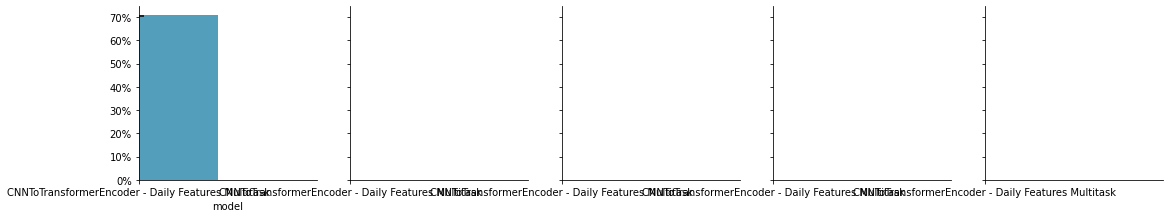

In [118]:
g = sns.FacetGrid(
    data=summaries_df,
    col="task", hue="model"
)
g.map_dataframe(bars_with_labels_and_errors,"model","test/roc_auc","test/roc_auc_ci_plus")
g.add_legend()

In [ ]:
g = sns.FacetGrid(
    data=summaries_df,
    col="task", hue="model"
)